In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [47]:
data = pd.read_csv('../data/retail_store_data_with_real_items.csv')
data.head()

,Date,Day,Item Name,Price,In Stock,Total Stock,Sales,Stock Left,Revenue
0,2022-01-01,Saturday,Tea,11.65,True,64,19,45,221.35
1,2022-01-01,Saturday,Shaving Cream,36.52,True,78,23,55,839.96
2,2022-01-01,Saturday,All-Purpose Cleaner,13.58,True,109,28,81,380.24
3,2022-01-01,Saturday,Rice,6.30,True,187,14,173,88.20
4,2022-01-01,Saturday,Perfume,43.33,True,137,0,137,0.00


In [48]:
# Total unique items
total_unique_items = data['Item Name'].nunique()
print('Total unique items:', total_unique_items)

Total unique items: 99


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         109600 non-null  object 
 1   Day          109600 non-null  object 
 2   Item Name    109600 non-null  object 
 3   Price        109600 non-null  float64
 4   In Stock     109600 non-null  bool   
 5   Total Stock  109600 non-null  int64  
 6   Sales        109600 non-null  int64  
 7   Stock Left   109600 non-null  int64  
 8   Revenue      109600 non-null  float64
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 6.8+ MB


In [50]:
data['Item Name'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
109595    False
109596    False
109597    False
109598    False
109599    False
Name: Item Name, Length: 109600, dtype: bool

In [51]:
data['Date'] = pd.to_datetime(data['Date'])

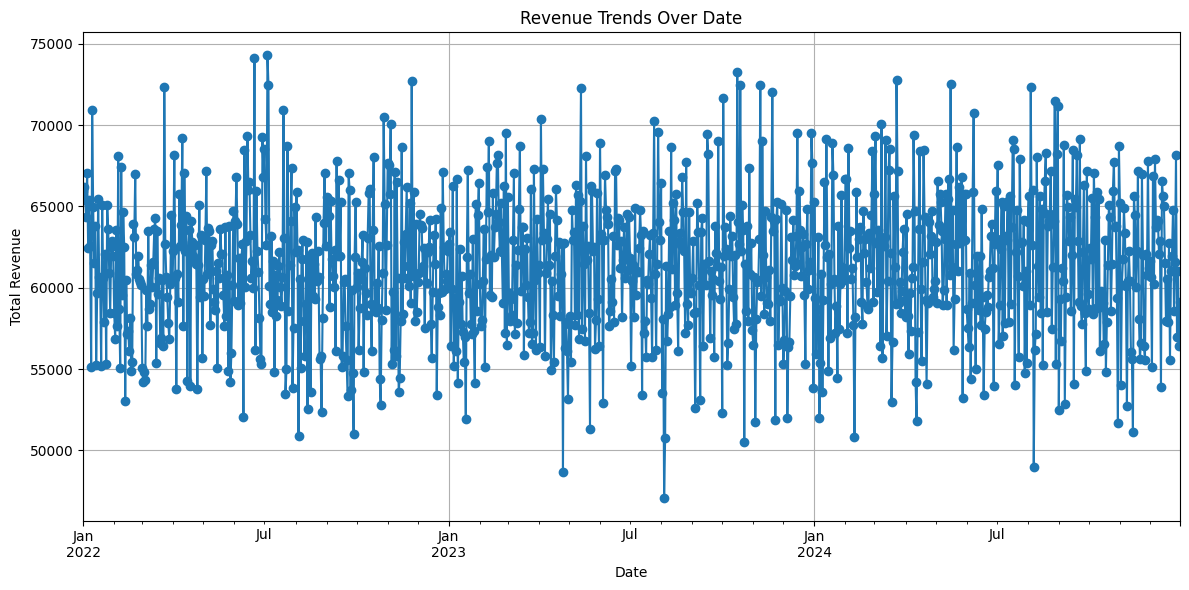

In [52]:
plt.figure(figsize=(12, 6))
data.groupby('Date')['Revenue'].sum().plot(kind='line', marker='o')
plt.title('Revenue Trends Over Date')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
data.isnull().sum()

Date           0
Day            0
Item Name      0
Price          0
In Stock       0
Total Stock    0
Sales          0
Stock Left     0
Revenue        0
dtype: int64

In [54]:
# Check for duplication
data.duplicated().sum()

np.int64(0)

In [55]:
def EDA(data):
    print("----------Structure of the Data--------- \n")
    print("Shape of the datasets:", data.shape)
    print("\n Column Names:", data.columns)
    print("\n First 5 rows: \n", data.head())
    print("\n Data Info:\n")
    data.info()
    print("\n----------End Structure of the Data--------- \n")
    print("\n----------Summary, Missing Value, Data types --------- \n")
    print("\nSummary Statistics:\n", data.describe())
    print("\nMissing Values:\n", data.isnull().sum())
    print("\nData Types:\n", data.dtypes)
    print("\n----------End Summary, Missing Value, Data types --------- \n")

In [56]:
EDA(data)

----------Structure of the Data--------- 

Shape of the datasets: (109600, 9)

 Column Names: Index(['Date', 'Day', 'Item Name', 'Price', 'In Stock', 'Total Stock', 'Sales',
       'Stock Left', 'Revenue'],
      dtype='object')

 First 5 rows: 
         Date       Day            Item Name  Price  In Stock  Total Stock  \
0 2022-01-01  Saturday                  Tea  11.65      True           64   
1 2022-01-01  Saturday        Shaving Cream  36.52      True           78   
2 2022-01-01  Saturday  All-Purpose Cleaner  13.58      True          109   
3 2022-01-01  Saturday                 Rice   6.30      True          187   
4 2022-01-01  Saturday              Perfume  43.33      True          137   

   Sales  Stock Left  Revenue  
0     19          45   221.35  
1     23          55   839.96  
2     28          81   380.24  
3     14         173    88.20  
4      0         137     0.00  

 Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data c

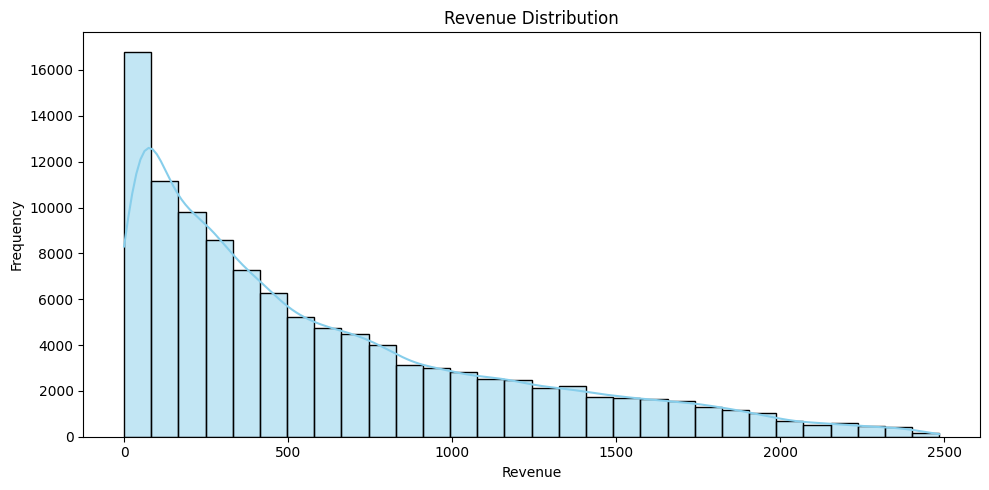

In [57]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Revenue'], bins=30, kde=True, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

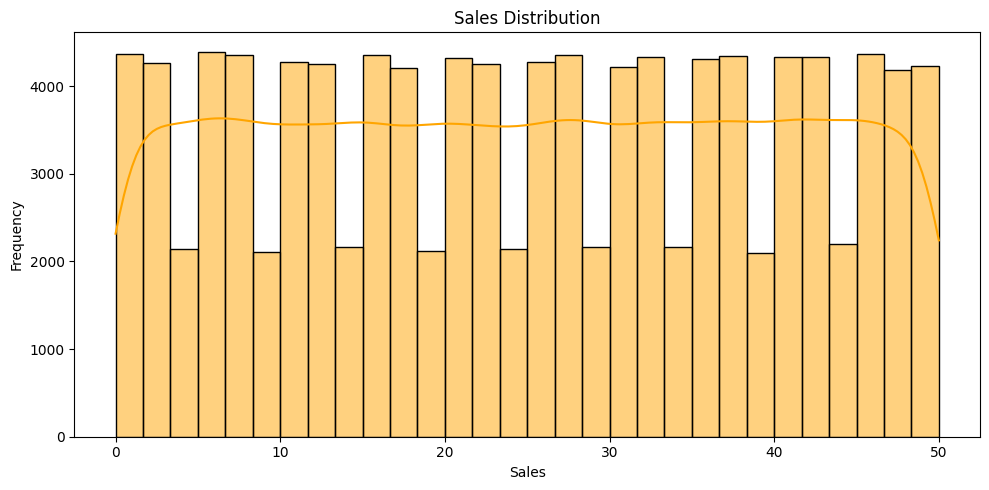

In [58]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Sales'], bins=30, kde=True, color='orange')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

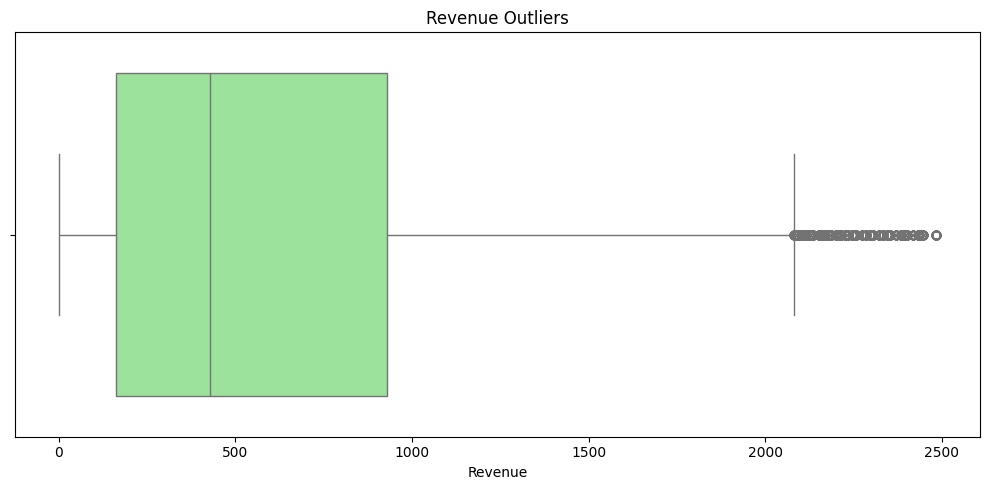

In [59]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Revenue', color='lightgreen')
plt.title('Revenue Outliers')
plt.tight_layout()
plt.show()

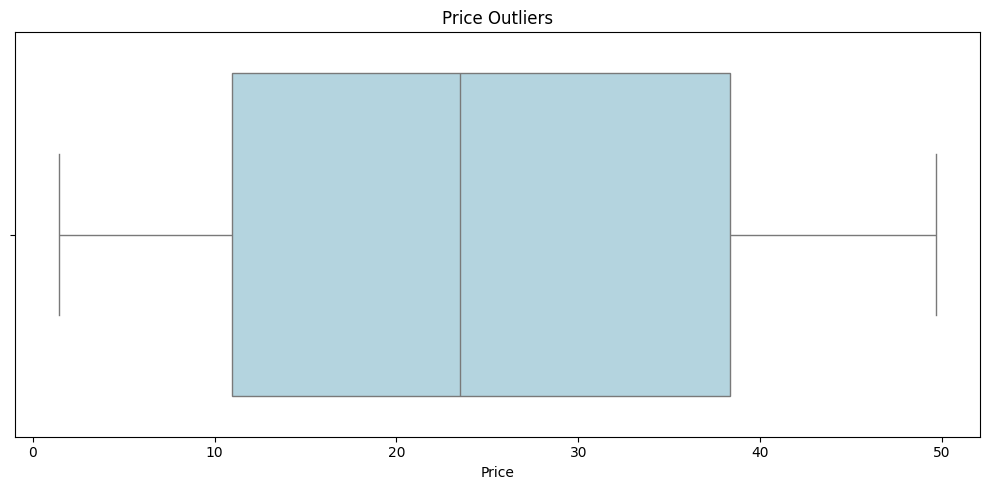

In [60]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Price', color='lightblue')
plt.title('Price Outliers')
plt.tight_layout()
plt.show()

In [61]:
numeric_data = data.select_dtypes(include=['float64','int64'])

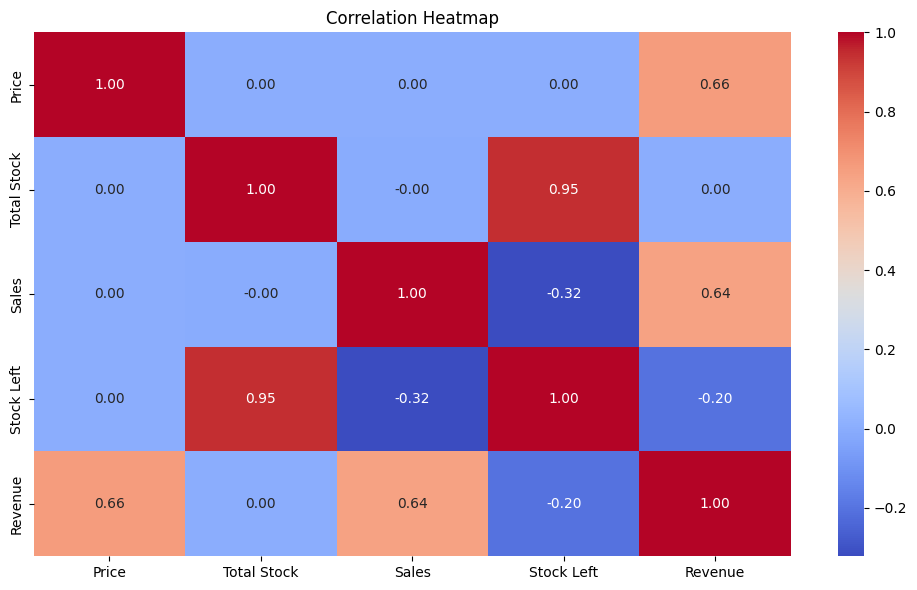

In [62]:
correlation = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [63]:
# Top-20 selling items
data.groupby('Item Name')['Revenue'].sum().sort_values(ascending=False).head(20)

Item Name
Toilet Brush      1383289.92
Vitamins          1372481.44
Phone Case        1351620.36
Shower Curtain    1351205.02
Strawberries      1342968.12
Floss             1327292.70
Vodka             1320563.27
Mugs              1313939.52
Trash Bags        1306688.00
Lime              1304883.84
Extension Cord    1294907.32
Comb              1237329.73
Headphones        1224480.18
Cookware          1170768.94
Perfume           1170083.32
Peas              1164963.87
Bleach            1137718.20
Butter            1123124.73
Cotton Balls      1118811.20
Rum               1093952.04
Name: Revenue, dtype: float64

<Axes: xlabel='Date'>

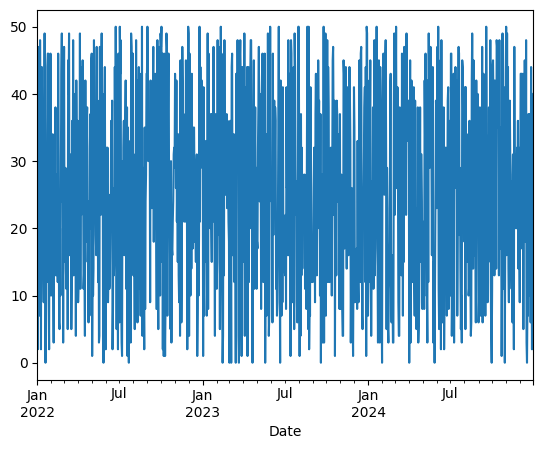

In [64]:
item_sales = data[data['Item Name'] == 'Toilet Brush']
item_sales.groupby('Date')['Sales'].sum().plot()

In [65]:
data.head()

,Date,Day,Item Name,Price,In Stock,Total Stock,Sales,Stock Left,Revenue
0,2022-01-01,Saturday,Tea,11.65,True,64,19,45,221.35
1,2022-01-01,Saturday,Shaving Cream,36.52,True,78,23,55,839.96
2,2022-01-01,Saturday,All-Purpose Cleaner,13.58,True,109,28,81,380.24
3,2022-01-01,Saturday,Rice,6.30,True,187,14,173,88.20
4,2022-01-01,Saturday,Perfume,43.33,True,137,0,137,0.00


### Most revenue generating month for each year

In [66]:
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
grouped_monthly = data.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

In [67]:
grouped_monthly['Month Name'] = grouped_monthly['Month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [68]:
# Sort by month
grouped_monthly = grouped_monthly.sort_values(by=['Year', 'Month'])
# grouped_monthly = grouped_monthly.sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True))
grouped_monthly[:14]

,Year,Month,Revenue,Month Name
0,2022,1,1928409.19,Jan
1,2022,2,1684004.67,Feb
2,2022,3,1852554.47,Mar
3,2022,4,1844784.30,Apr
4,2022,5,1878652.60,May
5,2022,6,1873574.18,Jun
6,2022,7,1919721.53,Jul
7,2022,8,1852425.62,Aug
8,2022,9,1821962.83,Sep
9,2022,10,1878679.21,Oct


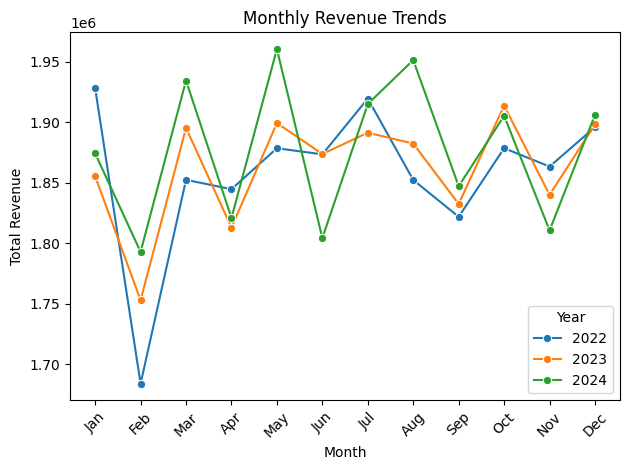

In [69]:
plt.Figure(figsize=(14, 8))
sns.lineplot(data=grouped_monthly, x='Month Name', y='Revenue', hue='Year', marker='o', palette='tab10')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

### Identify which item sold most in each month of each year

In [70]:
group_sales = data.groupby(['Year', 'Month', 'Item Name'])['Sales'].sum().reset_index()
group_revenue = data.groupby(['Year', 'Month', 'Item Name'])['Revenue'].sum().reset_index()


In [71]:
# Top 3 selling items and revenue generating items
top_selling_items = group_sales.sort_values(['Year', 'Month', 'Sales'], ascending=[True, True, False]).groupby(['Year', 'Month']).head(3).reset_index(drop=True)
top_revenue_generating_items = group_revenue.sort_values(['Year', 'Month', 'Revenue'], ascending=[True, True, False]).groupby(['Year', 'Month']).head(3).reset_index(drop=True)
top_selling_items

,Year,Month,Item Name,Sales
0,2022,1,Batteries,1556
1,2022,1,Dish Soap,941
2,2022,1,Tequila,925
3,2022,2,Batteries,1583
4,2022,2,Lemon,941
...,...,...,...,...
103,2024,11,Lemon,935
104,2024,11,Strawberries,928
105,2024,12,Batteries,1599
106,2024,12,Vodka,1022


In [72]:
top_revenue_generating_items

,Year,Month,Item Name,Revenue
0,2022,1,Vodka,42894.02
1,2022,1,Toilet Brush,41184.72
2,2022,1,Shower Curtain,40155.40
3,2022,2,Vodka,37121.63
4,2022,2,Mugs,34272.00
...,...,...,...,...
103,2024,11,Floss,43521.00
104,2024,11,Trash Bags,39344.76
105,2024,12,Vodka,47962.46
106,2024,12,Floss,42298.50


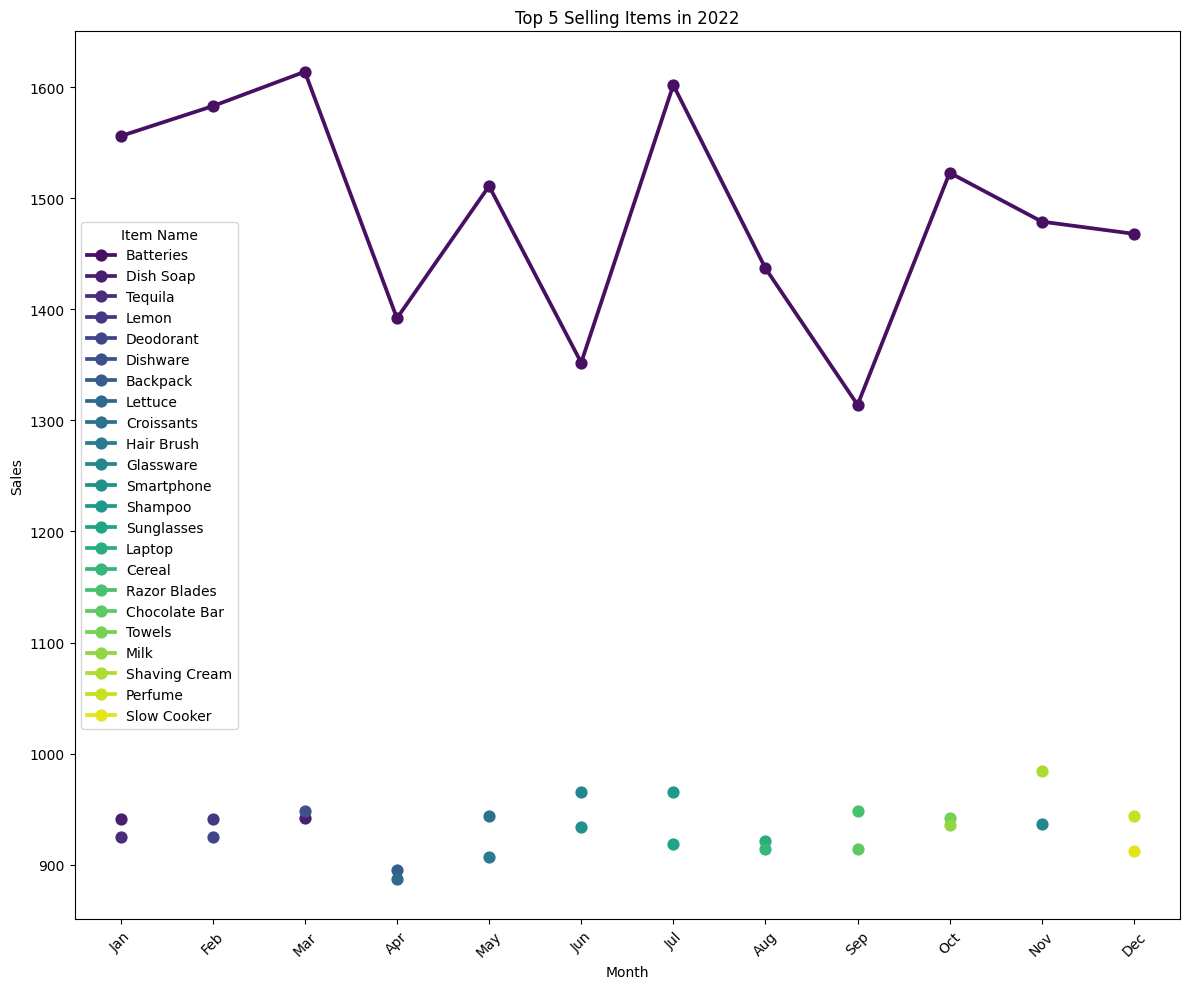

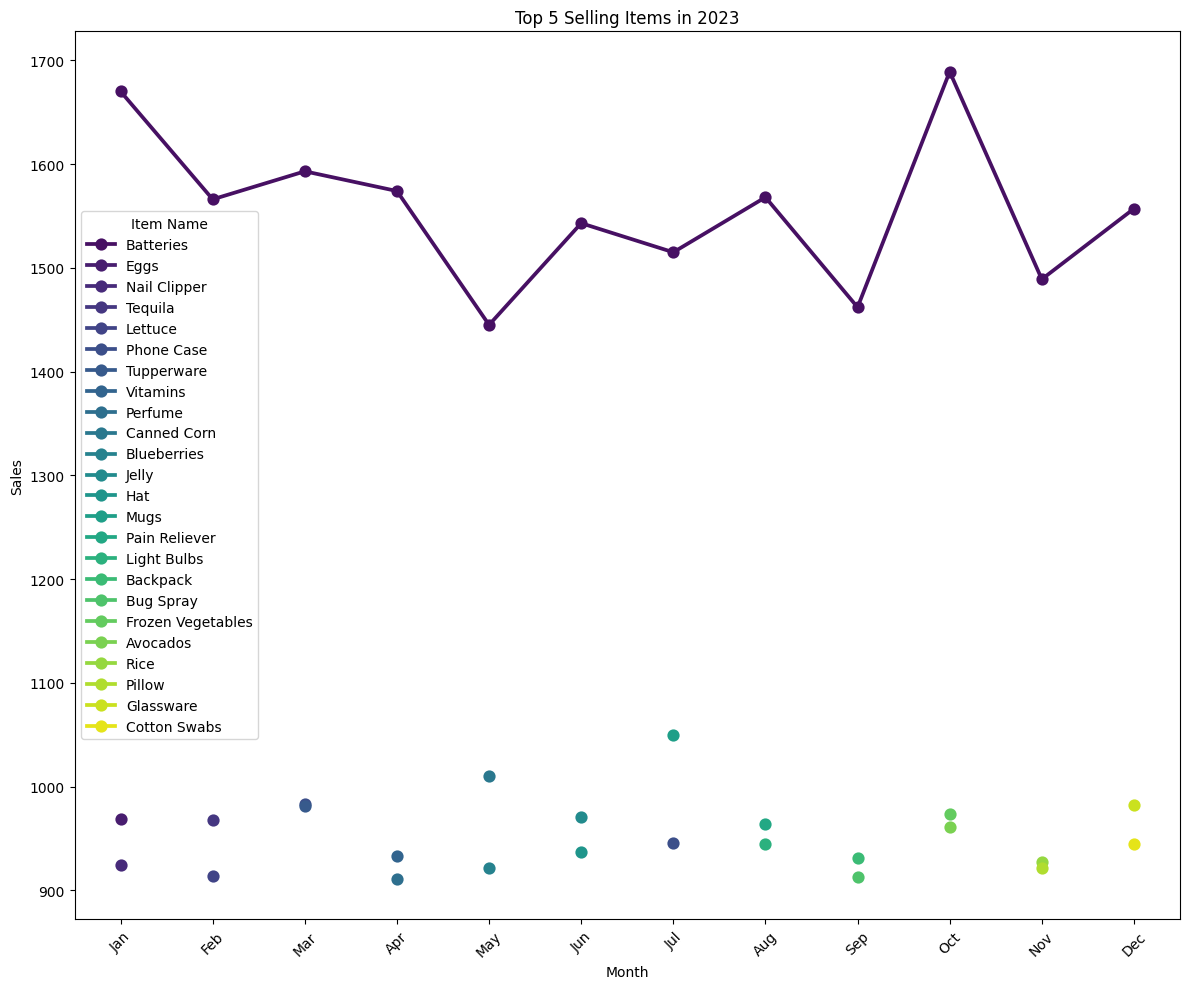

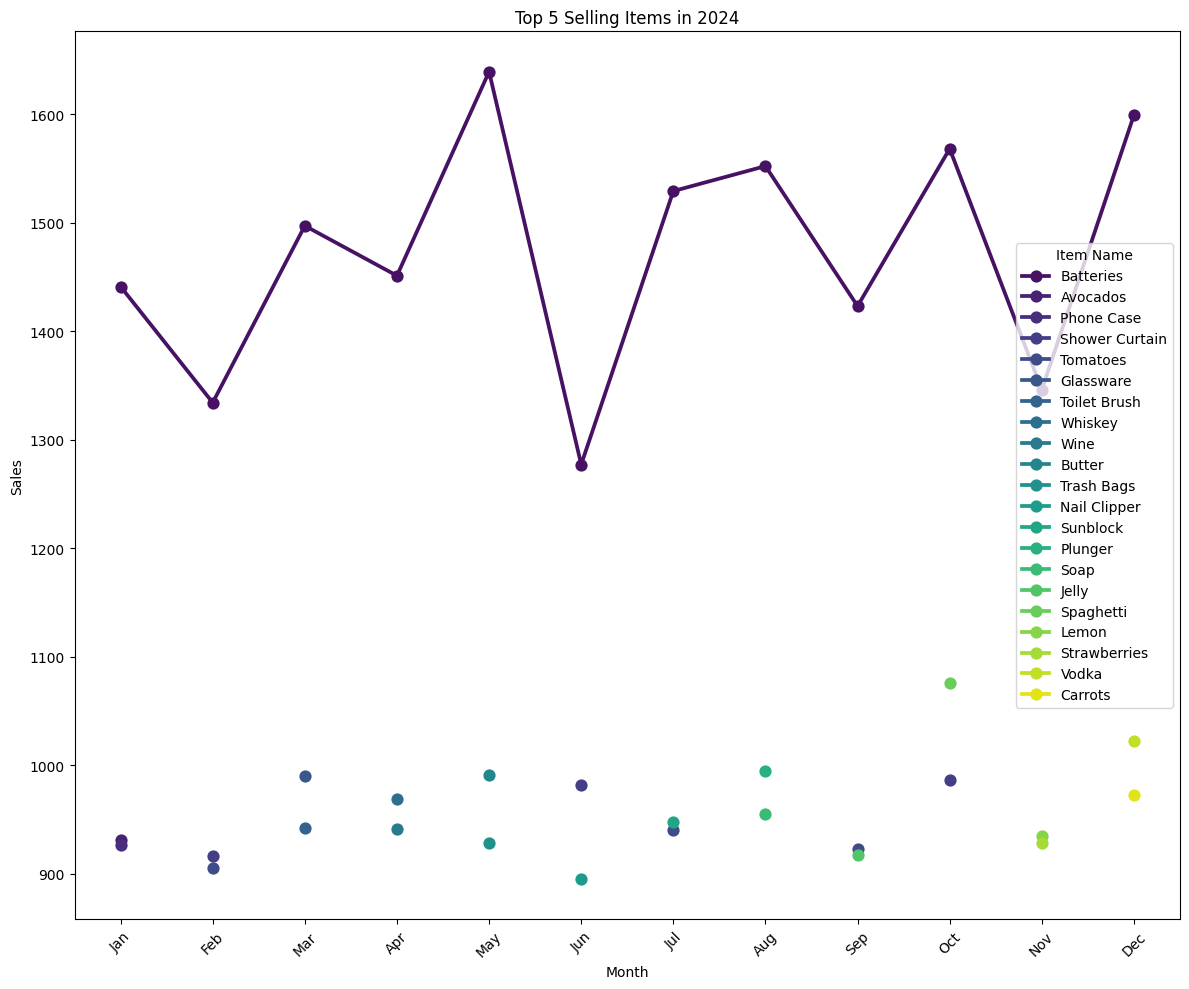

In [73]:
# Get unique years
unique_years = top_selling_items['Year'].unique()

# Set the number of rows and columns for plotting
n_rows = 1  # We will plot one graph per year
n_cols = len(unique_years)  # One column per year

# Create a plot for each year
for year in unique_years:
    # Filter data for the specific year
    data_year = top_selling_items[top_selling_items['Year'] == year]
    
    # Set up the plot for this year
    plt.figure(figsize=(12, 10))
    
    # Create a line plot for the year with markers
    sns.pointplot(data=data_year, x='Month', y='Sales', hue='Item Name', marker='o', palette='viridis')
    
    # Set x-axis labels and rotate
    plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    
    # Set axis labels and title
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.title(f'Top 5 Selling Items in {year}')
    
    # Add a legend
    plt.legend(title='Item Name')
    
    # Adjust the layout to make it clear
    plt.tight_layout()
    
    # Show the plot
    plt.show()

/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_4685/3269804675.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
/opt/anaconda3/envs/sales_automation/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/sales_automation/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best ARIMA order: (1, 0, 0)
RMSE with features: 6.44


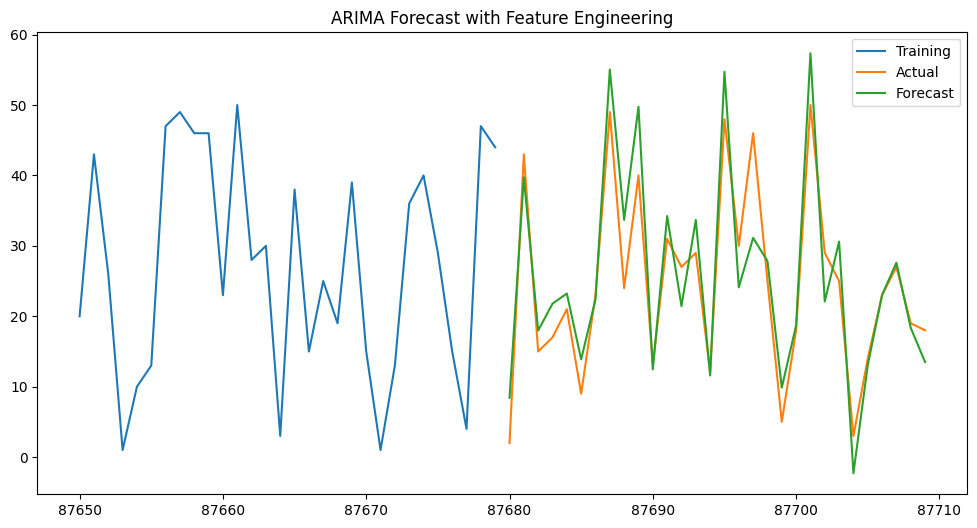

In [74]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_features(df):
    df = df.copy()
    
    # Ensure 'Date' column is of datetime type
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Ensure numeric columns are of correct type
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
    df['Total Stock'] = pd.to_numeric(df['Total Stock'], errors='coerce')
    df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
    df['Stock Left'] = pd.to_numeric(df['Stock Left'], errors='coerce')
    df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
    
    # Time features
    df['month'] = df['Date'].dt.month
    df['quarter'] = df['Date'].dt.quarter
    df['year'] = df['Date'].dt.year
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)
    
    # Item features
    df['stock_ratio'] = df['Stock Left'] / df['Total Stock']
    df['price_bins'] = pd.qcut(df['Price'], q=5, labels=[1, 2, 3, 4, 5])
    df['price_bins'] = pd.to_numeric(df['price_bins'], errors='coerce')
    df['sales_ratio'] = df['Sales'] / df['Total Stock']
    
    # Rolling features (grouped by itemname)
    for window in [7, 30]:
        df[f'sales_ma_{window}d'] = df.groupby('Item Name')['Sales'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean())
        df[f'revenue_ma_{window}d'] = df.groupby('Item Name')['Revenue'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean())
        df[f'stock_ma_{window}d'] = df.groupby('Item Name')['Stock Left'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean())
    
    # Interaction features
    df['price_stock_ratio'] = df['Price'] * df['stock_ratio']
    df['sales_price_ratio'] = df['Sales'] * df['Price']
    
    # Lag features (grouped by itemname)
    df['sales_lag1'] = df.groupby('Item Name')['Sales'].shift(1)
    df['sales_lag7'] = df.groupby('Item Name')['Sales'].shift(7)
    
    # Fill missing values
    df = df.fillna(method='bfill')
    
    return df

# Apply feature engineering
sales_data_featured = create_features(data)

# Split data for modeling
train_size = int(len(sales_data_featured) * 0.8)
train = sales_data_featured[:train_size]
test = sales_data_featured[train_size:]

from statsmodels.tsa.arima.model import ARIMA

def grid_search_arima(series, p_values, d_values, q_values):
    best_aic = float("inf")
    best_order = None
    best_model = None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                        best_model = results
                except:
                    continue
    return best_order, best_model


# Define the range of parameters to search
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Perform grid search
best_order, best_model = grid_search_arima(train['Sales'], p_values, d_values, q_values)
print("Best ARIMA order:", best_order)

# Separate features and target
features = ['dayofweek', 'month', 'quarter', 'is_weekend', 'stock_ratio', 'price_bins', 'sales_ratio',
           'sales_lag1', 'sales_lag7', 'sales_ma_7d', 'sales_ma_30d','price_stock_ratio', 'sales_price_ratio']
X_train = train[features]
y_train = train['Sales']
X_test = test[features]
y_test = test['Sales']

# Modify ARIMA model to use exogenous variables
model = ARIMA(endog=y_train, exog=X_train, order=(1,0,0))
fitted_model = model.fit()

# Generate forecasts with exogenous variables
forecast = fitted_model.forecast(steps=len(test), exog=X_test)

#Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, forecast))
print(f'RMSE with features: {rmse:.2f}')

# Plot results
plt.figure(figsize=(12,6))
plt.plot(y_train.index[-30:], y_train[-30:], label='Training')
plt.plot(y_test.index[:30], y_test[:30], label='Actual')
plt.plot(y_test.index[:30], forecast[:30], label='Forecast')
plt.title('ARIMA Forecast with Feature Engineering')
plt.legend()
plt.show()

/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_4685/3269804675.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
/opt/anaconda3/envs/sales_automation/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/sales_automation/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/sales_automation/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported i

Best ARIMA order: (0, 0, 0)


/opt/anaconda3/envs/sales_automation/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/sales_automation/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/sales_automation/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/sales_automation/lib/python3.10/site-packages/statsmodels/t

RMSE with features: 6.43


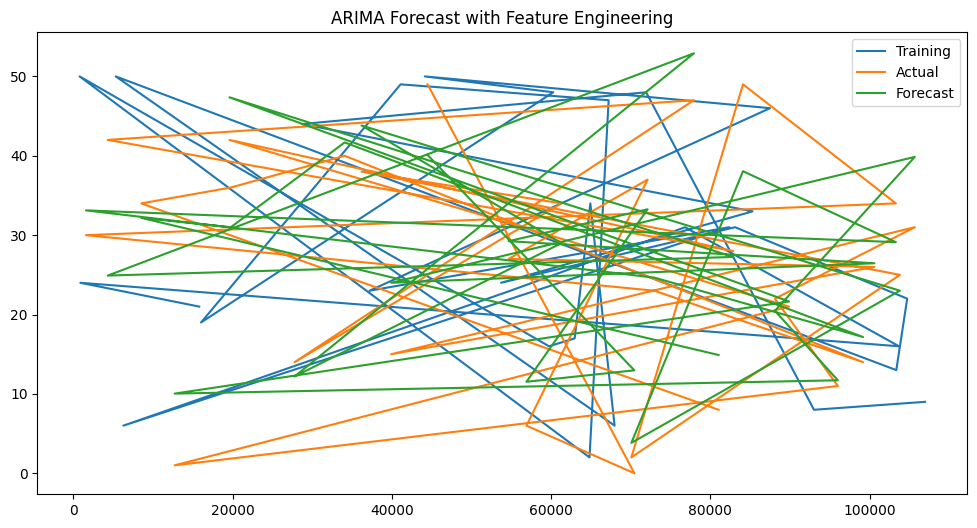

In [84]:
from sklearn.model_selection import train_test_split

# Apply feature engineering
sales_data_featured = create_features(data)

# Split data for modeling
train, test = train_test_split(sales_data_featured, test_size=0.2, random_state=42, shuffle=True)

# Define the range of parameters to search
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Perform grid search
best_order, best_model = grid_search_arima(train['Sales'], p_values, d_values, q_values)
print("Best ARIMA order:", best_order)

# Separate features and target
features = ['dayofweek', 'month', 'quarter', 'is_weekend', 'stock_ratio', 'price_bins', 'sales_ratio',
           'sales_lag1', 'sales_lag7', 'sales_ma_7d', 'sales_ma_30d','price_stock_ratio', 'sales_price_ratio']
X_train = train[features]
y_train = train['Sales']
X_test = test[features]
y_test = test['Sales']

# Modify ARIMA model to use exogenous variables
model = ARIMA(endog=y_train, exog=X_train, order=(1,0,0))
fitted_model = model.fit()

# Generate forecasts with exogenous variables
forecast = fitted_model.forecast(steps=len(test), exog=X_test)

#Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, forecast))
print(f'RMSE with features: {rmse:.2f}')

# Plot results
plt.figure(figsize=(12,6))
plt.plot(y_train.index[-30:], y_train[-30:], label='Training')
plt.plot(y_test.index[:30], y_test[:30], label='Actual')
plt.plot(y_test.index[:30], forecast[:30], label='Forecast')
plt.title('ARIMA Forecast with Feature Engineering')
plt.legend()
plt.show()